In [3]:
using LinearAlgebra
using Plots
using DelimitedFiles

# Problem 1
## Part a

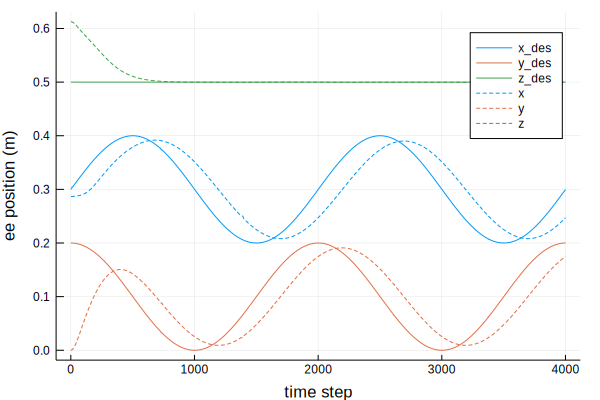

In [7]:
data1a = readdlm("../bin/hw3/prob1a.txt",',');
plot(data1a[1:4000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data1a[1:4000,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

The trajectory does not perfectly match the desired trajectory: it has some time delay on the sinusoidal response, likely since we're not anticipating the desired trajectory.

## Part b
$\dot{x}_d = 0.1\begin{bmatrix} \pi \cos(\pi t) \\ -\pi sin(\pi t) \\ 0 \\ \end{bmatrix} $  
$\ddot{x}_d = 0.1\begin{bmatrix} -\pi^2 \sin(\pi t) \\ -\pi^2 cos(\pi t) \\ 0 \\ \end{bmatrix} $


## Part c

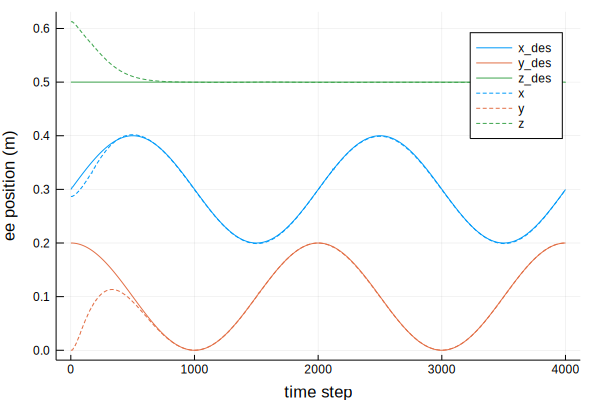

In [9]:
data1c = readdlm("../bin/hw3/prob1c.txt",',');
plot(data1c[1:4000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data1c[1:4000,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

This obviously tracks much better than before, and is nearly perfect. This makes sense since we're providing it with information about about the trajectory is headed so that it can anticipate the velocity and acceleration required to get there.

# Problem 2
## Part a
$$ V_{mid}(q) = k_{mid} \sum_{i=1}^n \big( q_i - \frac{\bar{q}_i + \underline{q}_i}{2} \big)^2 $$  
$$ \nabla V_{mid,i} = 2 k_{mid} \big(q_i - \frac{\bar{q}_i + \underline{q}_i}{2} \big) $$
$$ \Gamma_{mid,i} = -2 k_{mid} \big(q_i - \frac{\bar{q}_i + \underline{q}_i}{2} \big) $$

## Part b
Obviously the $J_v^TF+g$ terms are the same in the two expressions for the commanded torques.

The $\mathcal{N}^T \Gamma_{mid}$ does essentially the same thing as $\mathcal{N}^T(-k_{pj}(q-q_d))$, where $q_{d,i} = \frac{\bar{q}_i + \underline{q}_i}{2}$ and $k_{pj} = -2 k_{mid}$.

The $\mathcal{N}^T \Gamma_{damp}$ also does essentially the same thing as $\mathcal{N}^T (-k_{vj}\dot{q})$, where $-k_{damp} = -k_{vj}$.

## Part c
$k_{mid} = \frac{1}{2} k_{pj} = 25$  
$k_{damp} = k_{vj} = 14$

## Part d

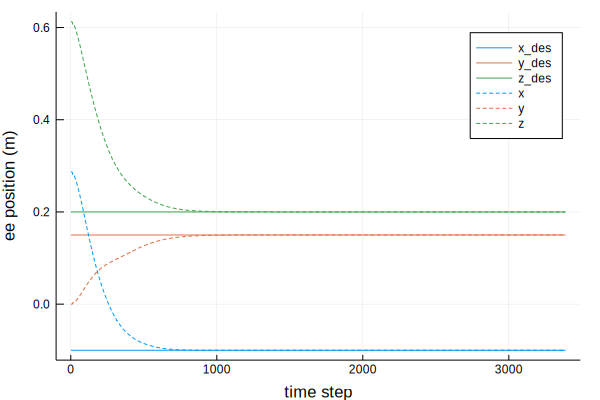

In [12]:
data2d = readdlm("../bin/hw3/prob2d.txt",',');
plot(data2d[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data2d[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

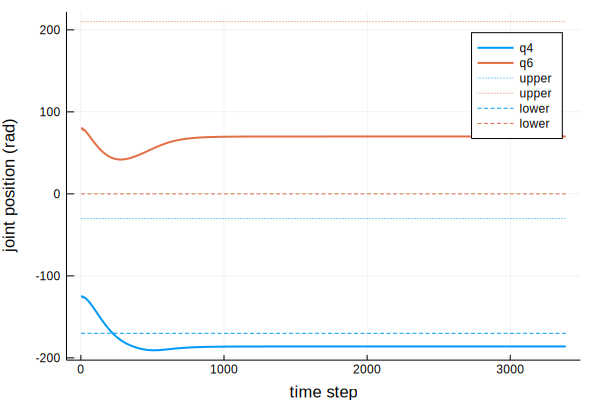

In [43]:
q_lo = [-165,-100,-165,-170,-165,0,-165]
q_up = [165,100,165,-30,165,210,165]
joints = [4,6]
plot(rad2deg.(data2d[:,joints.+6]),xlabel="time step",ylabel="joint position (rad)", label=["q4" "q6"],width=2)
plot!(repeat(q_up',size(data2d,1),1)[:,joints],color=collect(1:2)',style=:dot, label="upper")
plot!(repeat(q_lo',size(data2d,1),1)[:,joints],color=collect(1:2)',style=:dash, label="lower")

The tracking is working very well: it converges quickly to the desired position in task space without any overshooting. However, it is clearly violating the joint limit on joint 4. Joint 6 does not violate its limit.

## Part e

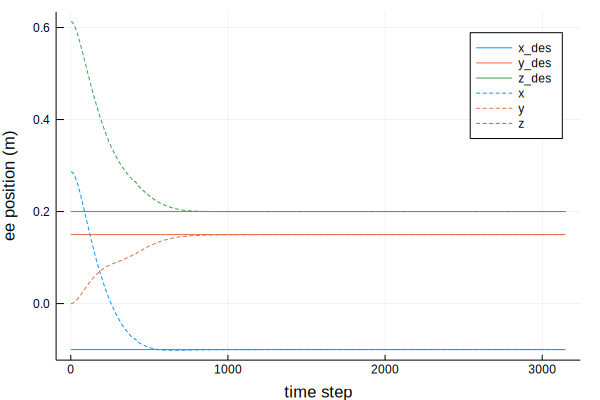

In [53]:
data2e = readdlm("../bin/hw3/prob2e.txt",',');
plot(data2e[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data2e[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

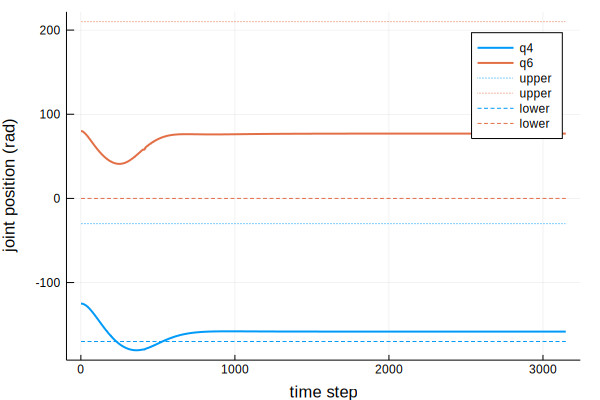

In [54]:
plot(rad2deg.(data2e[:,joints.+6]),xlabel="time step",ylabel="joint position (rad)", label=["q4" "q6"],width=2)
plot!(repeat(q_up',size(data2e,1),1)[:,joints],color=collect(1:2)',style=:dot, label="upper")
plot!(repeat(q_lo',size(data2e,1),1)[:,joints],color=collect(1:2)',style=:dash, label="lower")

The controller is still able to track the desired position; however, the perforance is worse. It takes longer to get to the goal, and isn't as smooth. The joint limits were not obeyed. You can see that it bumps up against the lower limit on joint 4 and then backs off.

## Part f

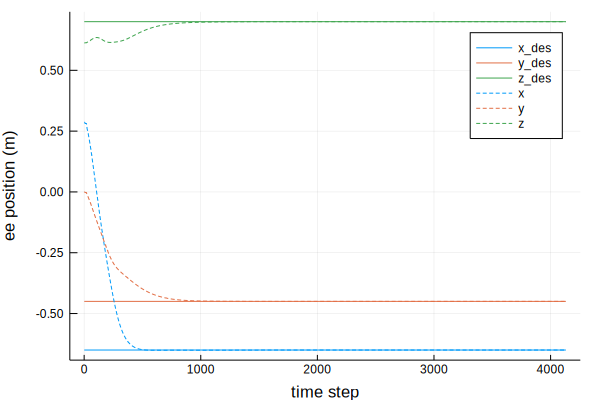

In [57]:
data2f = readdlm("../bin/hw3/prob2f.txt",',');
plot(data2f[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data2f[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

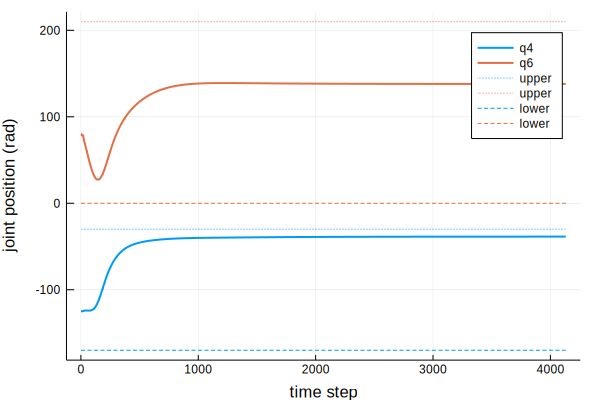

In [58]:
plot(rad2deg.(data2f[:,joints.+6]),xlabel="time step",ylabel="joint position (rad)", label=["q4" "q6"],width=2)
plot!(repeat(q_up',size(data2f,1),1)[:,joints],color=collect(1:2)',style=:dot, label="upper")
plot!(repeat(q_lo',size(data2f,1),1)[:,joints],color=collect(1:2)',style=:dash, label="lower")

The tracking is similar as before, it's fairly fast and pretty smooth, but isn't as smooth as the controllers that don't account for the joint limits. On this problem, the joint limits are respected whereas before they were not. 

## Part g

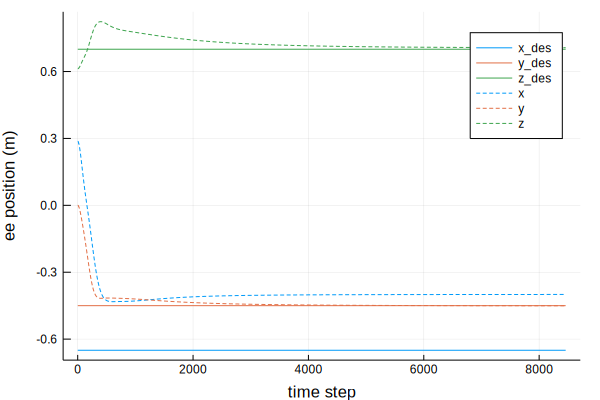

In [59]:
data2g = readdlm("../bin/hw3/prob2g.txt",',');
plot(data2g[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data2g[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

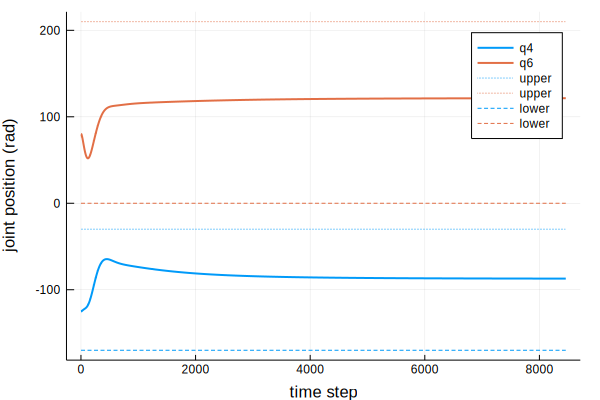

In [60]:
plot(rad2deg.(data2g[:,joints.+6]),xlabel="time step",ylabel="joint position (rad)", label=["q4" "q6"],width=2)
plot!(repeat(q_up',size(data2g,1),1)[:,joints],color=collect(1:2)',style=:dot, label="upper")
plot!(repeat(q_lo',size(data2g,1),1)[:,joints],color=collect(1:2)',style=:dash, label="lower")

This time the end effector did not reach the goal. The x position has a constant offset, and the tracking performance in y and z was much worse. The joint limits are definitely obeyed and stay very close to the middle of the range. Which controller to use depends upon your priorities. If you care about getting to your goal, don't use this one. If you want to get kind of close to your goal while remaining safely away from your joint limits, you should use this one. We see this behavior since both goal tracking and staying in the middle of the range are "primary" objectives, and will achieve a balance between the two, whereas before  we were only obeying joint limits in the null space of the "primary" objective of tracking the goal.

## Part h
There are several ways you could implement a controller to guarantee joint limit avoidance, while not affecting the task far from the limits. The best way to do this is through an optimization-based approach, such as trajectory optimization. You could also use some type of barrier method that explodes to infinity at the joint limits and decays very quickly away from the limit. You could a log function, for example, of course playing the tricks to make it differentiable and dual-sided.

# Problem 3

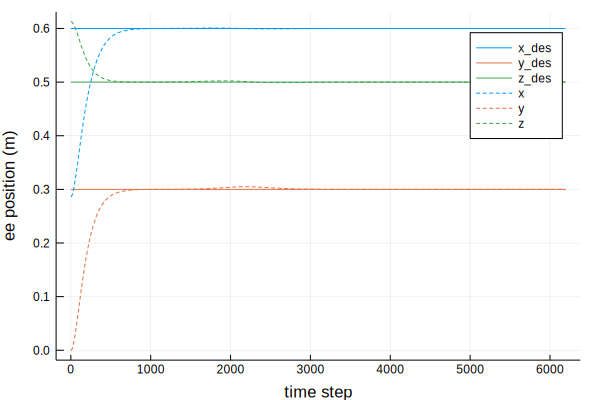

In [65]:
data3 = readdlm("../bin/hw3/prob3.txt",',');
plot(data3[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data3[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

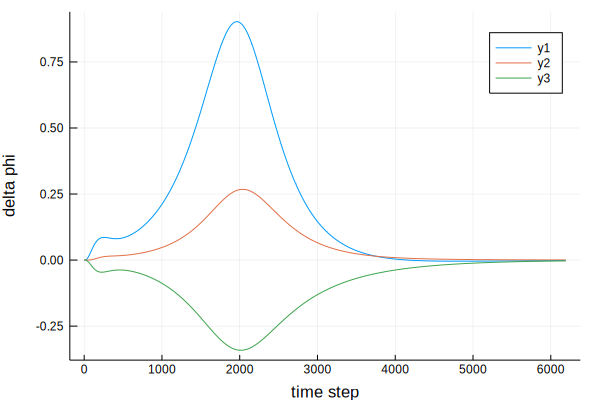

In [69]:
δϕ = data3[:,14:16]
plot(δϕ,xlabel="time step",ylabel="delta phi", color=[1 2 3])

The robot moves to the desired goal pretty quickly. The robot appears to reach the desired orientation as well, but takes a bit longer to converge than the position.

# Problem 4
## Part a

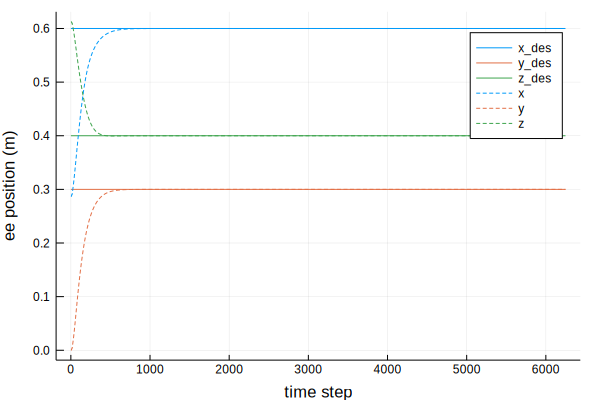

In [78]:
data4 = readdlm("../bin/hw3/prob4.txt",',');
plot(data4[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data4[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

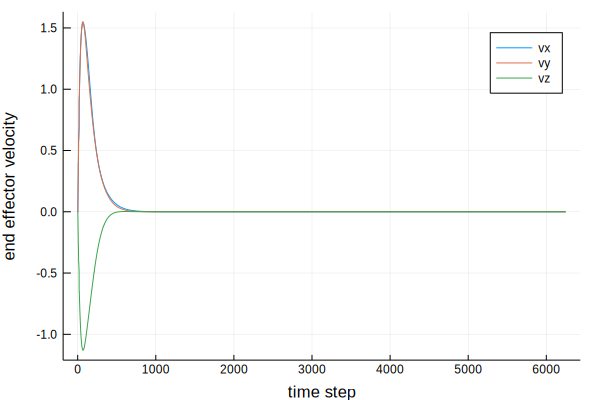

In [80]:
xdot = data4[:,14:16]
plot(xdot,xlabel="time step",ylabel="end effector velocity", color=[1 2 3], label=[:vx,:vy,:vz])

The robot gets to the target location very quickly and smoothly, but has a large spike in the velocity of the end effector right at the beginning of the trajectory, resulting in very high accelerations. 

## Part b

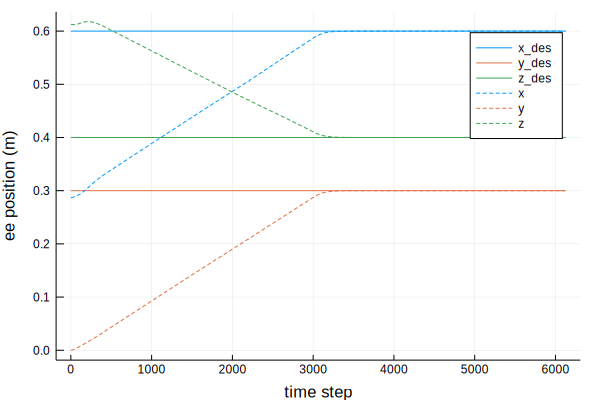

In [82]:
data4b = readdlm("../bin/hw3/prob4b.txt",',');
plot(data4b[:,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data4b[:,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

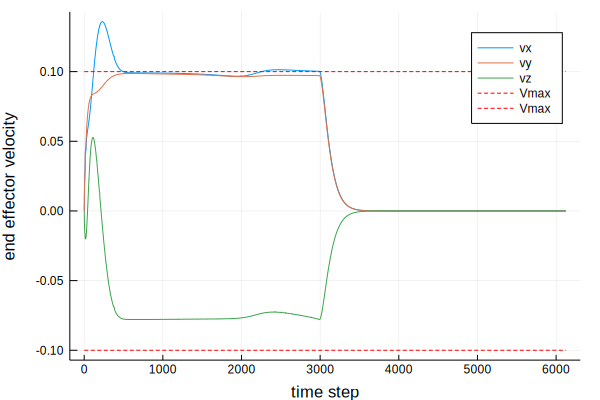

In [86]:
xdot = data4b[:,14:16]
Vmax = 0.1*ones(size(xdot,1))
plot(xdot,xlabel="time step",ylabel="end effector velocity", color=[1 2 3], label=[:vx,:vy,:vz])
plot!(Vmax, label="Vmax", color=:red, style=:dash)
plot!(-Vmax, label="Vmax", color=:red, style=:dash)

The behavior is as expected. The velocity is saturated at a maximum value so the robot moves linearly towards the goal. The maximum velocity is only exceeded at the beginning, likely due to the acceleration of the previous time steps and the dynamics of the robot. Overall this controller seems to work pretty well at keeping the robot from moving too fast while still making good, smooth progress towards the goal.